# Adludio Data Science Challenge
## Business Overview
Adludio is an online mobile ad business. It provides the following service to its clients
●	Design an interactive Ad - what is called also a “creative”. A creative is a rich ad containing interaction elements through a mini game-engine, video, text, images etc.. 
●	Serves these creatives to audiences on behalf of a client. In order to do that, adludio buy impressions from an open market through bidding.  
●	In order to make a good profit while also satisfying clients needs, adludio employs campaign managers and bidding and other algorithms to optimise the bidding strategy. One of the algorithms we use is called bayesian bandit, and it is used to optimise budget allocation across different campaign strategies (adgroups - see glossary below)


###   Below is the Variable description of the  dataset
| variable         | description |
| ---------------- | ------------|
| `Item_id`        |  one of the adgroup ids in a campaign. | 
| `Item_group_id`  |  campaign id consisting of several item/adgroup ids. |
| `date`           |  date that the data is from. | 
| `created_at`     | date when the data was uploaded to the database. |
| `num_success`    | represents the number of successful events. | 
| `num_trials`     |  represents the number of total trials, for engagement rate optimization. | 
| `num_engagements`|  number of first dropped/engagement events for that day. |  
| `num_impressions`|  total number of impressions served for that day. | 
| `num_clickthroughs`|  number of user click events for that day. | 
| `daily_spend`    |  amount of money spent in the background on serving those impressions. |  
| `revenue`        |  amount of money generated by satisfying KPI(Key Performance Indicator :ER,CTR ) benchmarks.| 
| `Engagement Rate (ER)` | number of engagements divided by the the number of impressions.  |
| `Click Through Rate (CTR)` | - the number of clicks divided by the number of engagements. 



#### Importing the neccessary libraries

In [31]:
#Importing the required libraries.
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

#### Importing the data

In [2]:
#Importing the data.
url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': ['b5yn8r3', 's2dmtni', 'bwik4qv', '73t0r3u', 'wqgxoc1', 
                                 'u2t9dgi', 'uwyvrja', 'pace1ha', 'vf03dnt', '36b7iyw' ] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')

In [3]:
#Having a look at the data;
df.head()

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5
1,yar3gt3,b5yn8r3,2020-07-27,2021-02-01 18:53:14,260,2991,260,2991,4,11.61,78.0
2,1wr71gl,b5yn8r3,2020-07-27,2021-02-01 18:53:14,286,2968,286,2968,9,12.03,85.8
3,1wr71gl,b5yn8r3,2020-07-28,2021-02-01 18:53:14,349,3169,349,3169,11,12.87,104.7
4,p673nlk,b5yn8r3,2020-07-28,2021-02-01 18:53:14,339,3306,339,3306,2,12.88,101.7


### Data understanding
Let's now get to understand how our data looks like.

In [4]:
# Getting the summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            1460 non-null   object 
 1   item_group_id      1460 non-null   object 
 2   date               1460 non-null   object 
 3   created_at         1460 non-null   object 
 4   num_success        1460 non-null   int64  
 5   num_trials         1460 non-null   int64  
 6   num_engagements    1460 non-null   int64  
 7   num_impressions    1460 non-null   int64  
 8   num_clickthroughs  1460 non-null   int64  
 9   daily_spend        1460 non-null   float64
 10  revenue            1460 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 125.6+ KB


In [5]:
# printing the shape
print('data shape :', df.shape)

data shape : (1460, 11)


In [6]:
#Checking the unique values for each variable
df.nunique()

item_id                34
item_group_id           9
date                  139
created_at            126
num_success           682
num_trials           1127
num_engagements       682
num_impressions      1127
num_clickthroughs     105
daily_spend           859
revenue               846
dtype: int64

In [7]:
# Checking the missing values
df.isnull().sum()

item_id              0
item_group_id        0
date                 0
created_at           0
num_success          0
num_trials           0
num_engagements      0
num_impressions      0
num_clickthroughs    0
daily_spend          0
revenue              0
dtype: int64

Great, there are no missing values.

In [8]:
# Summary of the numerical columns
df.describe()

,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,412.226712,4399.104795,412.226712,4399.104795,19.739041,15.993253,96.915185
std,587.705474,13662.163115,587.705474,13662.163115,26.795286,26.707712,114.985743
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000
25%,63.000000,578.750000,63.000000,578.750000,3.000000,2.340000,14.400000
50%,227.000000,1338.000000,227.000000,1338.000000,11.000000,7.035000,52.350000
75%,487.250000,2857.500000,487.250000,2857.500000,30.000000,15.502500,168.400000
max,4163.000000,130448.000000,4163.000000,130448.000000,325.000000,185.860000,923.000000


Next, we seek to identify the aggregate adgroups in each campaign before we choose our threeitem_group_id's.

In [9]:
agg_itemid = df.groupby(['item_group_id']).agg({'item_id':'count'})
agg_itemid.columns = ['agg_item_id']
agg_itemid = agg_itemid.reset_index()
agg_itemid.sort_values(by = 'agg_item_id',ascending = False)

,item_group_id,agg_item_id
7,uwyvrja,378
3,bwik4qv,246
2,b5yn8r3,222
5,s2dmtni,162
1,73t0r3u,141
4,pace1ha,120
6,u2t9dgi,96
0,36b7iyw,54
8,wqgxoc1,41


#### Selecting my  three `item_group_id's`of choice.
In this instance, I am going to pick the top three campaigns.

In [11]:
#Campaignsto be selected 
selected_campaigns=['uwyvrja', 'bwik4qv','b5yn8r3'] 

#Creating the new set of data with the three campaigns of my choice to be used for the tasks
task_df = df[df.item_group_id.isin(selected_campaigns)]
task_df.reset_index(drop=True).head()

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5
1,yar3gt3,b5yn8r3,2020-07-27,2021-02-01 18:53:14,260,2991,260,2991,4,11.61,78.0
2,1wr71gl,b5yn8r3,2020-07-27,2021-02-01 18:53:14,286,2968,286,2968,9,12.03,85.8
3,1wr71gl,b5yn8r3,2020-07-28,2021-02-01 18:53:14,349,3169,349,3169,11,12.87,104.7
4,p673nlk,b5yn8r3,2020-07-28,2021-02-01 18:53:14,339,3306,339,3306,2,12.88,101.7


In [12]:
#confirming the item_group_id's
task_df['item_group_id'].value_counts()

uwyvrja    378
bwik4qv    246
b5yn8r3    222
Name: item_group_id, dtype: int64

 Next we add the two impotant columns which are used as Key performance indicators i.e `Engagement Rate (ER):
number of engagements divided by the the number of impressions` and  `Click Through Rate (CTR) - the number of clicks divided by the number of engagements`

In [13]:
#Adding the two columns.
task_df.eval('engagement_rate =  num_engagements / num_impressions',inplace=True)
task_df.eval('clickthrough_rate =  num_clickthroughs  / num_engagements',inplace=True)

In [15]:
#Having a glimpse of the  data with the additional columns:ER & CTR.
task_df.head()

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,engagement_rate,clickthrough_rate
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277
1,yar3gt3,b5yn8r3,2020-07-27,2021-02-01 18:53:14,260,2991,260,2991,4,11.61,78.0,0.086927,0.015385
2,1wr71gl,b5yn8r3,2020-07-27,2021-02-01 18:53:14,286,2968,286,2968,9,12.03,85.8,0.096361,0.031469
3,1wr71gl,b5yn8r3,2020-07-28,2021-02-01 18:53:14,349,3169,349,3169,11,12.87,104.7,0.110129,0.031519
4,p673nlk,b5yn8r3,2020-07-28,2021-02-01 18:53:14,339,3306,339,3306,2,12.88,101.7,0.102541,0.005900


## Task 1
#### 1. A time evolutions plot of the engagement rate for all the different adgroups/item_ids within the selected campaign Id /item_group_id.

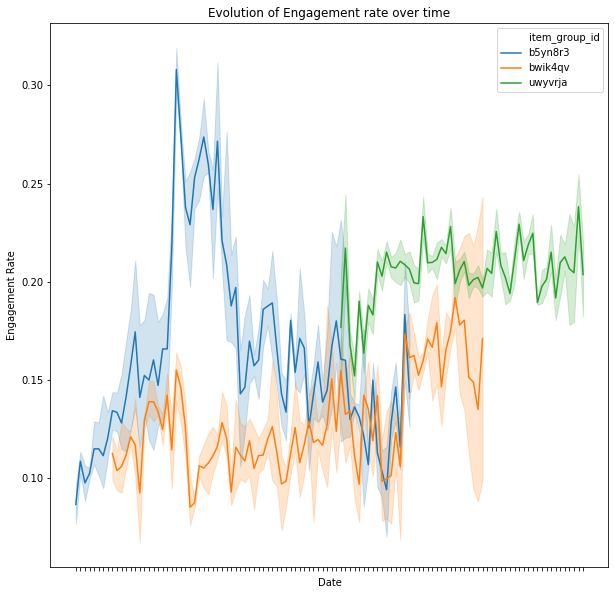

In [17]:
# defining the plot size.
plt.figure(figsize=(10,10))

# plotting a lineplot.
er_plot = sns.lineplot(data=task_df, x="date", y="engagement_rate", hue="item_group_id",)

# Set label for x-axis
er_plot.set_xlabel('Date')

# Set label for y-axis 
er_plot.set_ylabel ('Engagement Rate')

# Set title for plot 
er_plot.set_title("Evolution of Engagement rate over time")

# Rotate the x axis tick labels
er_plot.set_xticklabels(er_plot.get_xticklabels(), rotation=90);

### Interpretation
Item_group_Id `b5yn8r3` has a higher engagement rate compared to the `bwik4qv` at the start of the campaign. `uwyvrja` is introduced midway and performs better than the rest of the campaigns.

#### 2. A time evolutions plot of the clickthrough rate for all the different adgroups/item_ids within the selected campaign Id /item_group_id.

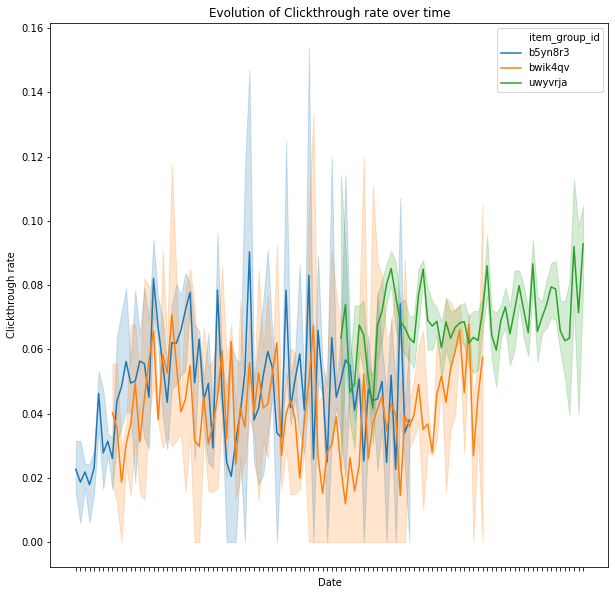

In [18]:
# defining the plot size.
plt.figure(figsize=(10,10))

# plotting a lineplot.
cr_plot = sns.lineplot(data=task_df, x="date", y="clickthrough_rate", hue="item_group_id",)

# Set label for x-axis
cr_plot.set_xlabel('Date')

# Set label for y-axis 
cr_plot.set_ylabel ('Clickthrough rate')

# Set title for plot 
cr_plot.set_title("Evolution of Clickthrough rate over time")

# Rotate the x axis tick labels
cr_plot.set_xticklabels(cr_plot.get_xticklabels(), rotation=90);

### Interpretation;
Item_group_Id `b5yn8r3` has a higher clickthrough rate compared to the `bwik4qv` at the start of the campaign. `uwyvrja` is introduced midway and performs better than the rest of the campaigns.

## Task 2
#### Importing additional data: Ad trade desk data

In [19]:
# Importing the additional data
additional_df = pd.read_csv (r'A:\Projects\Data Science\10 Academy Fellowship\Adludio\algos-challenge\data\GLOBAL-461053 Adludio History 2021-02-26.csv')
# a view of the data
additional_df.head()

,modifiedon,user,table,column,OldValue,NewValue,primarykey,secondarykey,modifiedby,source
0,2021-02-19 15:32:05.1885877,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-02-23T04:59:00,2021-02-22T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
1,2021-02-18 01:51:18.8845678,angela.yu@adludio.com,CampaignFlight,EndDateExclusiveUTC,2021-03-01T04:59:00,2021-02-23T04:59:00,rf33gwg,2023334,ttd_api,.Net SqlClient Data Provider
2,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,3874.000000,gehehl7,2037170,ttd_api,.Net SqlClient Data Provider
3,2021-02-12 17:15:49.9365387,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency,2980.000000,2086.000000,oropida,2037170,ttd_api,.Net SqlClient Data Provider
4,2021-02-12 17:15:49.9209108,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency,6476.920000,7370.920000,gehehl7,(null),ttd_api,.Net SqlClient Data Provider


In [20]:
#Selecting the columns of interest
trade_desk_data = additional_df[['modifiedon','primarykey','user','table','column']]

# Picking the dataset required in task 2;
trade_desk_data = trade_desk_data[#(trade_desk_data['user']  == 'ttd_api_ay6wyin@adludio.com') &
                                 (trade_desk_data['column']  == 'BudgetInAdvertiserCurrency') &
                                 ((trade_desk_data['table'] == 'AdGroupFlight')|(trade_desk_data['table'] == 'AdGroup'))]

In [21]:
#resetting the index
trade_desk_data= trade_desk_data.reset_index(drop=True)

#A glimpse of the data
trade_desk_data.head()

,modifiedon,primarykey,user,table,column
0,2021-02-12 17:15:49.9365387,gehehl7,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency
1,2021-02-12 17:15:49.9365387,oropida,angela.yu@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency
2,2021-02-12 17:15:49.9209108,gehehl7,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency
3,2021-02-12 17:15:49.9209108,oropida,angela.yu@adludio.com,AdGroup,BudgetInAdvertiserCurrency
4,2021-02-11 12:23:11.9851841,gq012j8,ttd_api_ay6wyin@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency


In [22]:
#checking the shape.
trade_desk_data.shape

(578, 5)

In [26]:
#Checking the unique values for each variable
trade_desk_data.nunique()

modifiedon    346
primarykey     46
user            5
table           2
column          1
dtype: int64

### Merging the dataset.

In [27]:
#Merging the data.
merged_data = pd.merge(task_df,trade_desk_data,left_on='item_id',right_on='primarykey')
#viewing the data
merged_data.head()

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,engagement_rate,clickthrough_rate,modifiedon,primarykey,user,table,column
0,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277,2020-09-16 08:34:02.9200000,p673nlk,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency
1,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277,2020-09-16 08:34:02.9170000,p673nlk,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency
2,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277,2020-09-15 08:06:13.1170000,p673nlk,mauricio.oliveira@adludio.com,AdGroupFlight,BudgetInAdvertiserCurrency
3,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277,2020-09-15 08:06:13.1130000,p673nlk,mauricio.oliveira@adludio.com,AdGroup,BudgetInAdvertiserCurrency
4,p673nlk,b5yn8r3,2020-07-27,2021-02-01 18:53:14,235,3052,235,3052,5,11.79,70.5,0.076999,0.021277,2020-09-04 14:59:08.1400000,p673nlk,ttd_api_ay6wyin@adludio.com,AdGroup,BudgetInAdvertiserCurrency


In [28]:
# Checking the missing values
merged_data.isnull().sum()

item_id              0
item_group_id        0
date                 0
created_at           0
num_success          0
num_trials           0
num_engagements      0
num_impressions      0
num_clickthroughs    0
daily_spend          0
revenue              0
engagement_rate      0
clickthrough_rate    0
modifiedon           0
primarykey           0
user                 0
table                0
column               0
dtype: int64

### Data Visualization

### Guiding Question;
Which parameters caused these budget changes hence affecting the performance change?


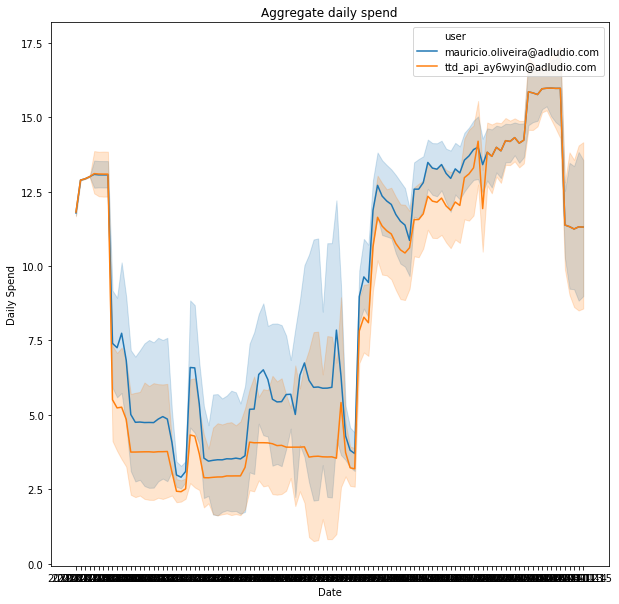

In [30]:
# defining the plot size.
plt.figure(figsize=(10,10))

# plotting a lineplot.
my_plot = sns.lineplot(data=merged_data, x="date", y="daily_spend", hue="user",)

# Set label for x-axis
my_plot.set_xlabel('Date');

# Set label for y-axis
my_plot.set_ylabel ('Daily Spend');

# Set  plot title
my_plot.set_title("Aggregate daily spend");

Interpretation;
For the selected three item_group_Id's, Mauricio Oliveira has a higher budget compared to the algorithm API. Therefore, the API saves the company money.

### KPI's comparison
`engagement_rate`

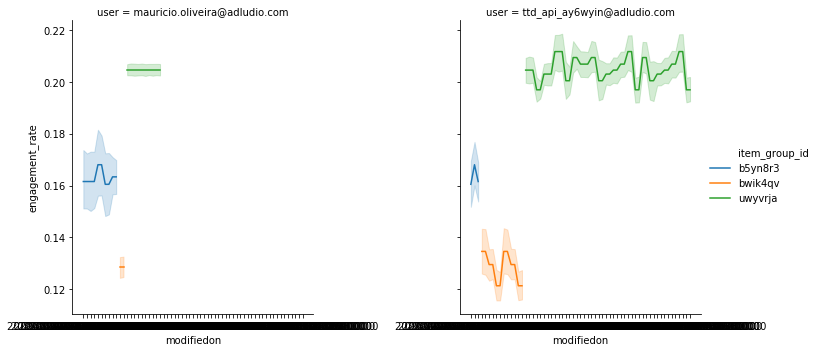

In [101]:
# plotting a replot.
sns.relplot(
    data=merged_data, kind="line",
    x="modifiedon", y="engagement_rate", col="user",
    hue="item_group_id")

`clickthrough_rate`

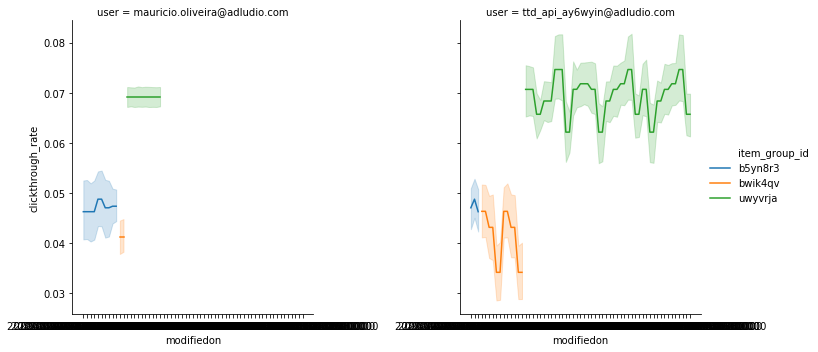

In [44]:
# plotting a replot.
sns.relplot(
    data=merged_data, kind="line",
    x="modifiedon", y="clickthrough_rate", col="user",
    hue="item_group_id")

### Conclusion;
From the above, the algorithm api performs better than the campain manager: mauricio Oliviera. It informs a better engagement rate and a better clickthrough rate.

`revenue Performnace`

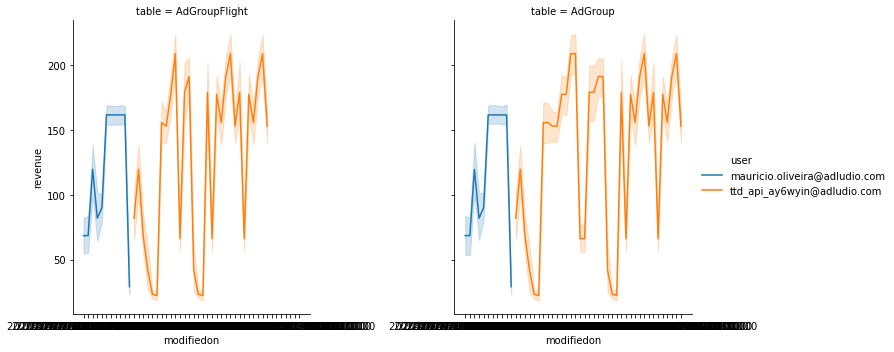

In [108]:
sns.relplot(
    data=merged_data, kind="line",
    x="modifiedon", y="revenue", col="table",
    hue="user")

As seen above, revenue is higher when the company uses the algorithm api compared to when having a manager.

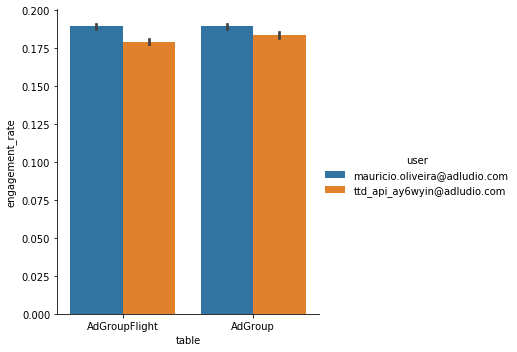

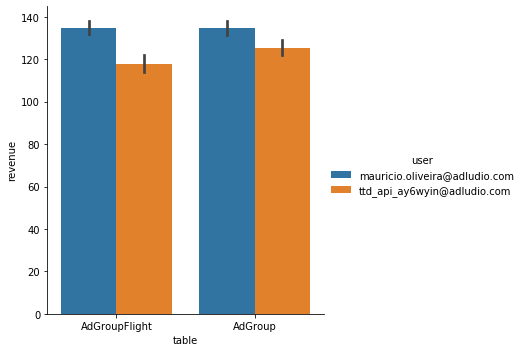

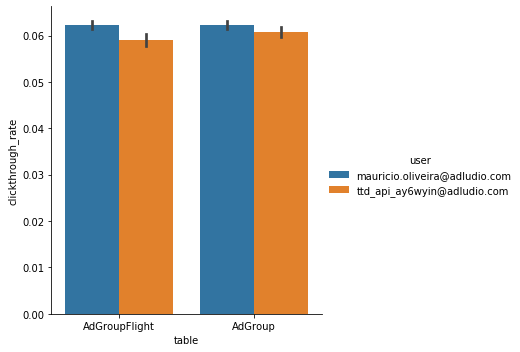

In [48]:
# barplot
sns.catplot( x="table", y="engagement_rate", hue="user", kind="bar", data=merged_data)
sns.catplot( x="table", y="revenue", hue="user", kind="bar", data=merged_data)
sns.catplot( x="table", y="clickthrough_rate", hue="user", kind="bar", data=merged_data)

### Task 3: API code diagram

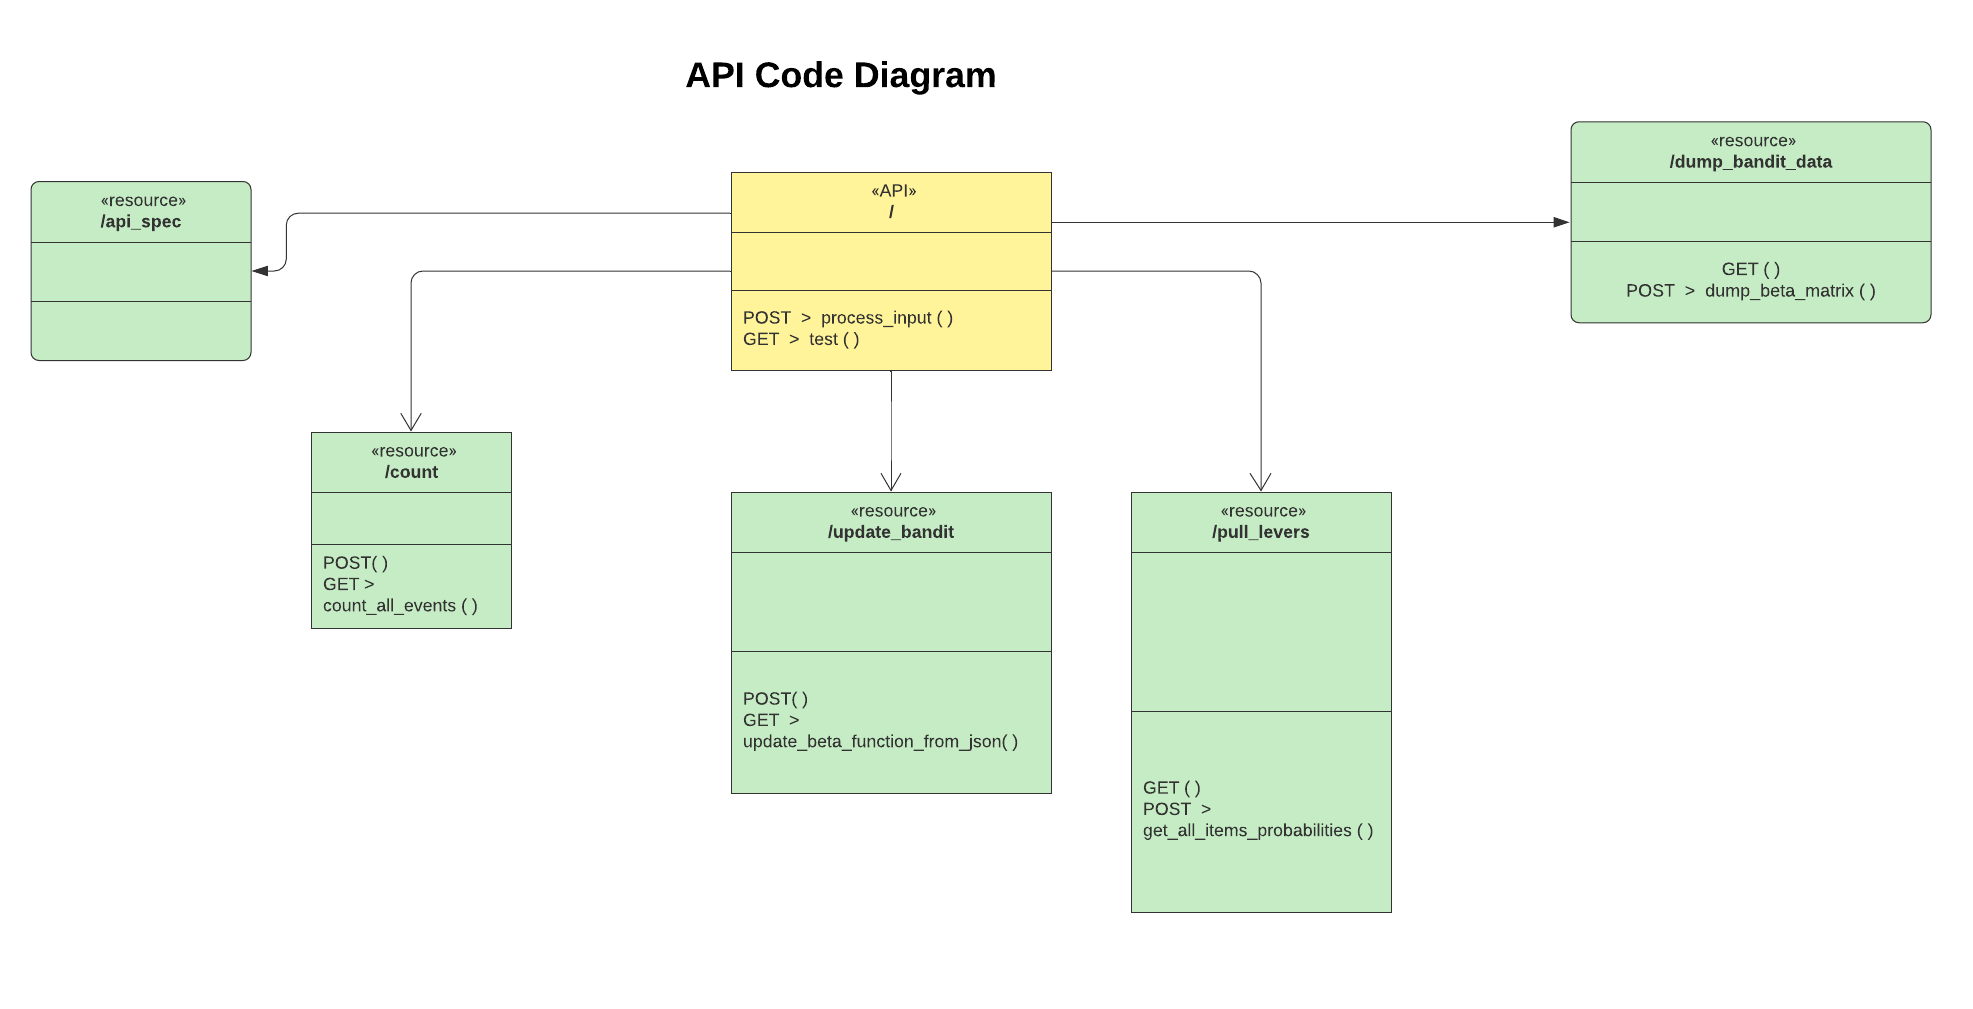

In [36]:
Image(filename="UML API diagram example.png")

## Additional comments
The functions had the following aspects; 
1. The aunthentification of the API was not implemented rendering it insecure.
2. Missing documentation making it harder for one to understand.

An explanation of each function has been incorporated in the `App.py` code.

## Task 4

### Possible approaches in tackling optimizaion of multiple KPI's 
1. Having a weighted score of all the current KPI's 
This factors in how each KPI relates to one another and gives a more robust picture of all the KPi's all together.

2. Visualization of real time performance of each KPI and how they affect each other.
This allows an oeganization make real time decisions based on real time data and change strategies per the business needs.